# Filtros Chebyshev

In [1]:
#NOTE importar bibliotecas
import numpy             as np
import matplotlib.pyplot as plt

from scipy        import signal
from scipy.signal import cheby1
from scipy.signal import cheby2

In [2]:
def freqs_plot(a,b,l=3,show=True): 
    w, h = signal.freqs(b, a, worN=np.logspace(0.1, l, 5000))
    plt.semilogx(w/2./np.pi, abs(h),linewidth=3)
    plt.xlabel('Frecuencia')
    plt.ylabel('Magnitud')
    plt.grid(True)
    if show:
        plt.show()

In [3]:
def bode_plot(H,show=True):
    w = np.linspace(.1,60,1000)
    w, mag, phase = signal.bode(H,w)
    plt.figure('mag')
    plt.semilogx(w, mag,linewidth=2.5)
    plt.title('Magnitud')
    plt.grid(True)
    
    plt.figure('phase')
    plt.semilogx(w, phase,linewidth=2.5)
    plt.title('Fase')
    plt.grid(True)
    if show:
        plt.show()

#### 1. Diseñe un filtro Chebyshev análogico tipo I pasa altas de orden 5 con frecuencia de corte 1.2 Hz; considere un factor de riso de 0.5 dB.

In [4]:
n  = 5
rp = .5
fc = 1.2
wc = 2*np.pi*fc

##### 1.1 Análisis de polos y ceros

[ 0.  0.  0.  0.  0.]
[ -0.81501600-7.36346847j  -4.63558359-9.88684654j -20.80986473-0.j
  -4.63558359+9.88684654j  -0.81501600+7.36346847j]
1.0


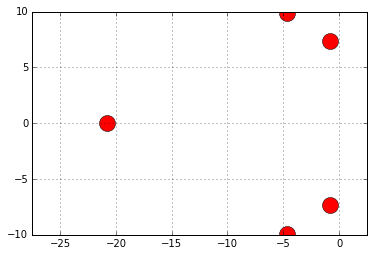

In [5]:
z,p,k  = cheby1(n, rp, wc, btype='high',analog=True, output='zpk')
print z
print p
print k

for i in p:
    plt.plot( i.real,i.imag,'or',markersize=16 )

plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show()


##### 1.2. Respuesta en frecuencia del filtro

0.944060876286


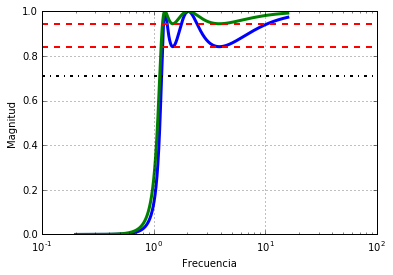

In [41]:
b, a = cheby1(n, rp, wc, btype='high',analog=True, output='ba')
dlt  = 10**(-rp/20)
print dlt
freqs_plot(a,b,2,False)
plt.axhline(y=dlt  , linewidth=2, color='r',linestyle='--')
plt.axhline(y=.7079, linewidth=2, color='k',linestyle='-.')
plt.show()

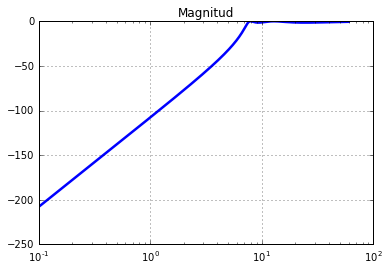

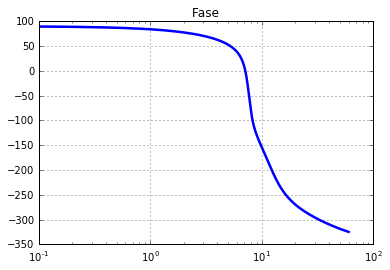

In [42]:
hp = signal.lti( z,p,k )
hp = signal.TransferFunction(hp)
bode_plot(hp)

##### 1.3. Función de transferencia

In [45]:
print hp

TransferFunctionContinuous(
array([ 1.,  0.,  0.,  0.,  0.,  0.]),
array([  1.00000000e+00,   3.90667540e+01,   4.69951704e+02,
         6.92066163e+03,   2.66166054e+04,   2.50413244e+05]),
dt: None
)


[[  -0.59741692+0.j   -3.71323979+0.j]
 [  58.85961487+0.j  139.73899480+0.j]]


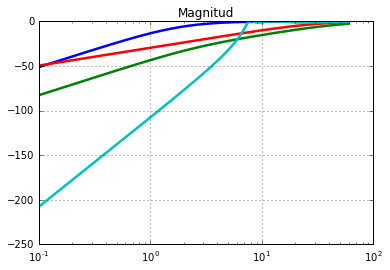

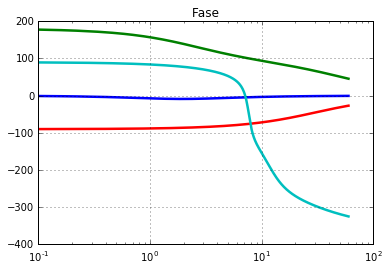

In [49]:
C = np.array(  [  p[:n/2].real, p[:n/2]*p[n/2+1:][::-1]  ]   )
print C

hp0 = signal.lti( [1, 0, 0], [ 1, C[0,0], C[0,1] ] )
hp1 = signal.lti( [1, 0, 0], [ 1, C[1,0], C[1,1] ] )
hp2 = signal.lti(    [1, 0], [         1, p[n/2] ] )

#HP  = hp0*hp1*hp2

bode_plot(hp0,False)
bode_plot(hp1,False)
bode_plot(hp2,False)
bode_plot(hp ,False)
plt.show()


In [ ]:
tf = signal.tf2sos(hp.num, hp.den)
print tf
#print tf.reshape(3,2,3)

##### 1.4. Coeficientes $\alpha_i$ y $\beta_i$

In [ ]:
wc  = 1.
b,a = cheby1(n, rp, wc, btype='high',analog=True, output='ba')
hp  = signal.TransferFunction(hp)
bode_plot(hp)

In [ ]:
tf = signal.tf2sos(b,a)

print tf.reshape(3,2,3)

### Comparación entre filtros Chebyshev tipo I y II pasa bajas

In [51]:
n  = 6
rp = .5
rs = 20.
fc = 60
wc = 2*np.pi*fc

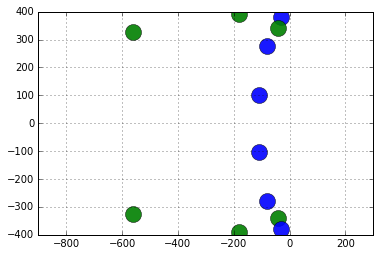

In [52]:
z_1,p_1,k_1  = cheby1(n, rp, wc, analog=True, output='zpk')
z_2,p_2,k_2  = cheby2(n, rs, wc, analog=True, output='zpk')

for i,j in zip(p_1,p_2):
    plt.plot( i.real,i.imag,'ob',markersize=16,alpha=.9 )
    plt.plot( j.real,j.imag,'og',markersize=16,alpha=.9 )

plt.axes().set_aspect('equal', 'datalim')
plt.grid(True)
plt.show()

0.944060876286 0.1


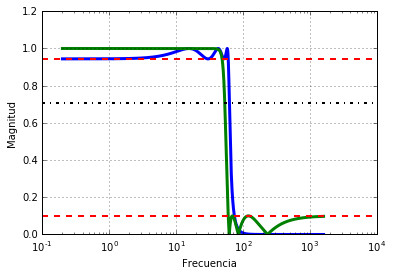

In [53]:
b_1,a_1  = cheby1(n, rp, wc, analog=True, output='ba')
b_2,a_2  = cheby2(n, rs, wc, analog=True, output='ba')

dlt  = 10**(-rp/20.)
drs  = 10**(-rs/20.)
print dlt, drs
freqs_plot(a_1,b_1,4,False)
freqs_plot(a_2,b_2,4,False)
plt.axhline(y=dlt  , linewidth=2, color='r',linestyle='--')
plt.axhline(y=drs  , linewidth=2, color='r',linestyle='--')
plt.axhline(y=.7079, linewidth=2, color='k',linestyle='-.')
plt.show()

In [ ]:
wc       = 1.
b_1,a_1  = cheby1(n, rp, wc, analog=True, output='ba')
b_2,a_2  = cheby2(n, rs, wc, analog=True, output='ba')

tfI  = signal.tf2sos(b_1,a_1)
tfII = signal.tf2sos(b_2,a_2)

print tfI .reshape(3,2,3)
print '\n\n'
print tfII.reshape(3,2,3)

In [ ]:
wc       = 1.
sr       = 120.
b_1,a_1  = cheby1(n, rp, wc, analog=True, output='ba')
b_2,a_2  = cheby2(n, rs, wc, analog=True, output='ba')

wc = 2*sr*np.tan(np.pi*wc/sr)

